# Opening images

This notebook will show how to access metadata and pixel values of images with QuBaLab.

QuBaLab uses the `ImageServer` class to open an image and get its metadata and pixel values. `ImageServer` is an abstract class, so it cannot be directly used. Instead, you have to choose an implementation based on the type of image you want to open:

* If you need to open an RGB pyramidal image, you can use the `OpenSlideServer`. This class internally uses [OpenSlide](https://openslide.org/): it can read all resolutions of a large pyramidal image but is only suitable for RGB images.
* If you need to open any kind of microscopy image, you can use the `AICSImageIoServer`. This class internally uses [AICSImageIO](https://github.com/AllenCellModeling/aicsimageio) which is suited for a lot of formats. However, this library does not properly support pyramids, so you might only get the full resolution image when opening a pyramidal image.
* If your image has an embedded ICC profile, or if you want to apply a custom ICC Profile to an image, you can use the `IccProfileServer`. This takes another `ImageServer` as a parameter and change pixels values. You can find more information about ICC profiles on [this link](http://www.andrewjanowczyk.com/application-of-icc-profiles-to-digital-pathology-images/).
* If you want to represent objects such as annotations or detections on an image, you can use the `LabeledImageServer`. Pixel values are labels corresponding to image features (such as annotations) present on an image. See the *working_with_objects.ipynb* notebook for more information.
* If you want to access an image opened in QuPath, you can use the `QuPathServer`. See the *communicating_with_qupath.ipynb* notebook for more information.

All these `ImageServer` are used in the same way, only their creation differ. This notebook will show how to create and use these servers.

## ImageServers creation

To create an `ImageServer`, you have to use one of the implementations presented above.

### OpenSlideServer

We will use the **CMU-1.svs** image (CC0 1.0 license) because it's a pyramidal RGB image.

In [1]:
# Download image

import urllib.request

cmu_path, _ = urllib.request.urlretrieve("https://openslide.cs.cmu.edu/download/openslide-testdata/Aperio/CMU-1.svs")
print(f'CMU-1.svs saved to {cmu_path}')

CMU-1.svs saved to /var/folders/zt/w6w5hpx561d_n1n6613yy7dh0000gt/T/tmpue5v2dyj


In [2]:
from qubalab.images.openslide_server import OpenSlideServer


# Create the ImageServer from the image path. This will read the image metadata but not the pixel values yet.
# This function has optional parameters you can find in the documentation
openslide_server = OpenSlideServer(cmu_path)

/Users/lleplat/QuPath/Projects/qubalab/qubalab/qubalab/images/openslide_server.py:9: UserWarning: Unable to import OpenSlide, will try TiffSlide instead
  warnings.warn(f'Unable to import OpenSlide, will try TiffSlide instead')
/Users/lleplat/QuPath/Projects/qubalab/qubalab/qubalab/images/openslide_server.py:39: UserWarning: compatibility: aliasing tiffslide.TiffSlide to 'OpenSlide'
  self._reader = openslide.OpenSlide(path)


### AICSImageIoServer

We will use the **LuCa-7color_[13860,52919]_1x1component_data.tif** image (CC-BY 4.0 license) because it's a small fluorescence image.

In [3]:
# Download image

import urllib.request

luca_path, _ = urllib.request.urlretrieve("https://downloads.openmicroscopy.org/images/Vectra-QPTIFF/perkinelmer/PKI_fields/LuCa-7color_%5b13860,52919%5d_1x1component_data.tif")
print(f'LuCa-7color_[13860,52919]_1x1component_data.tif saved to {luca_path}')

LuCa-7color_[13860,52919]_1x1component_data.tif saved to /var/folders/zt/w6w5hpx561d_n1n6613yy7dh0000gt/T/tmpefuai9qn


In [4]:
from qubalab.images.aicsimageio_server import AICSImageIoServer


# Create the ImageServer from the image path. This will read the image metadata but not the pixel values yet.
# This function has optional parameters you can find in the documentation
aicsimageio_server = AICSImageIoServer(luca_path)

/Users/lleplat/QuPath/Projects/qubalab/qubalab/.venv/lib/python3.12/site-packages/pydantic/_migration.py:283: UserWarning: `pydantic.error_wrappers:ValidationError` has been moved to `pydantic:ValidationError`.
  warnings.warn(f'`{import_path}` has been moved to `{new_location}`.')


### IccProfileServer

An `IccProfileServer` needs an existing `ImageServer`. We will use the `OpenSlideServer` created above, because it represents the **CMU-1.svs** image, and SVS images usually embed an ICC profile. However, any `ImageServer` can be used.

In [5]:
from qubalab.images.icc_profile_server import IccProfileServer

# Create the IccProfileServer from the existing OpenslideServer. The two servers will have the same metadata, but pixel values might differ a bit
icc_profile_server = IccProfileServer(openslide_server)

### LabeledImageServer

A `LabeledImageServer` represents objects such as annotations or detections on an image. It needs the metadata of an image and some objects.

We will not detail the creation of this server here. Take a look at the *working_with_objects.ipynb* notebook for more information. However, all functions presented below are also valid for a `LabeledImageServer`.

### QuPathServer

A `QuPathServer` allows to read an image opened in QuPath

We will not detail the creation of this server here. Take a look at the *communicating_with_qupath.ipynb* notebook for more information. However, all functions presented below are also valid for a `QuPathServer`.

## ImageServers usage

To access metadata and pixel values of an `ImageServer`, you can use the functions presented below.

These functions are available for any implementation of `ImageServer`. We will use the `OpenSlideServer` created above but they are also valid for any other `ImageServer`.

In [6]:
server = openslide_server  # you can change it to aicsimageio_server or icc_profile_server

### Image metadata

Image metadata is access with the `ImageServer.metadata` property.

In [7]:
# Access image metadata

metadata = server.metadata

print(f'Image path: {metadata.path}')
print(f'Image name: {metadata.name}')
print()

print('Levels:')
for level, shape in enumerate(metadata.shapes):
    print(f'Shape of level {level}: {shape}')
print()

print('Pixel calibration:')
print(f'Pixel length on x-axis: {metadata.pixel_calibration.length_x}')
print(f'Pixel length on y-axis: {metadata.pixel_calibration.length_y}')
print()

print(f'Pixel type: {metadata.dtype}')
print()

print(f'Downsamples: {metadata.downsamples}')
print()

print('Channels:')
for channel in metadata.channels:
    print(channel)

Image path: /var/folders/zt/w6w5hpx561d_n1n6613yy7dh0000gt/T/tmpue5v2dyj
Image name: tmpue5v2dyj

Levels:
Shape of level 0: ImageShape(x=46000, y=32914, t=1, c=3, z=1)
Shape of level 1: ImageShape(x=11500, y=8228, t=1, c=3, z=1)
Shape of level 2: ImageShape(x=2875, y=2057, t=1, c=3, z=1)

Pixel calibration:
Pixel length on x-axis: PixelLength(length=0.499, unit='micrometer')
Pixel length on y-axis: PixelLength(length=0.499, unit='micrometer')

Pixel type: <class 'numpy.uint8'>

Downsamples: (1, 4, 16)

Channels:
ImageChannel(name='Red', color=(1, 0, 0))
ImageChannel(name='Green', color=(0, 1, 0))
ImageChannel(name='Green', color=(0, 0, 1))


### Pixel values

Pixel values can be retrieved in two different ways:

* If the image is small enough to fit in memory, or if only one tile of the image should be read, then the `ImageServer.read_region()` function can be used.
* Otherwise, the `ImageServer.level_to_dask()` or `ImageServer.to_dask()` functions can be used. They will return a [Dask array](https://docs.dask.org/en/latest/array.html) which gives as a NumPy-like way to access the pixels without fitting all pixel values into memory. Indeed, as long as `compute()` is not called on the Dask array, the pixel values won't be read.

#### read_region()

`ImageServer.readRegion()` returns a NumPy array of a tile of the image with dimensions `(number_of_channels, tile_height, tile_width)`.

Image shape: (3, 2057, 2875)


<Axes: >

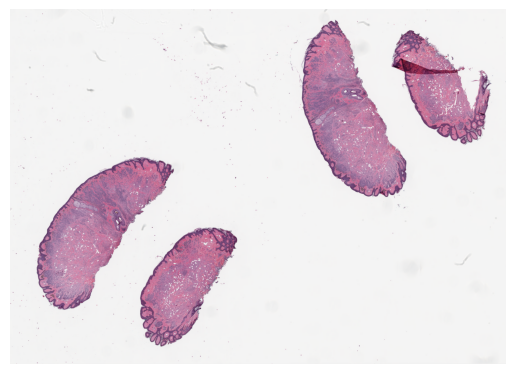

In [9]:
# Read and show lowest resolution image with read_region

highest_downsample = server.metadata.downsamples[-1]
lowest_resolution = server.read_region(highest_downsample)

print(f'Image shape: {lowest_resolution.shape}')

# This calls a utility function from qubalab to plot the image
from qubalab.display.plot import plotImage
import matplotlib.pyplot as plt
_, ax = plt.subplots()
plotImage(ax, lowest_resolution)           

Tile shape: (3, 1000, 2000)


<Axes: >

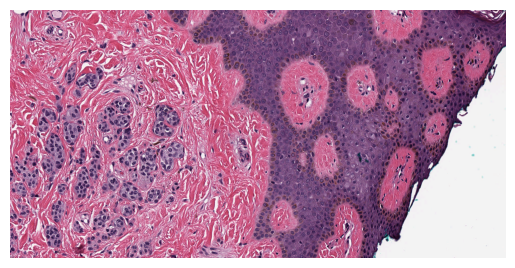

In [11]:
# Read and show tile of full resolution image with read_region

# Read a 2000x1000 pixels tile whose top left pixel is located at x=13000 and y=15000 on the full resolution image
downsample = 1
x = 13000
y = 15000
width = 2000
height = 1000
tile = server.read_region(downsample, x=x, y=y, width=width, height=height)

print(f'Tile shape: {tile.shape}')

_, ax = plt.subplots()
plotImage(ax, tile)

#### level_to_dask()

`ImageServer.level_to_dask()` returns a Dask array representing a single resolution of the image.

Pixels of the returned array can be accessed with the following order: (t, c, z, y, x). There may be less dimensions for simple images: for example, an image with a single timepoint and a single z-slice will return an array of dimensions (c, y, x) (which is the case here). However, there will always be dimensions x and y, even if they have a size of 1.

Image shape: (3, 2057, 2875)


<Axes: >

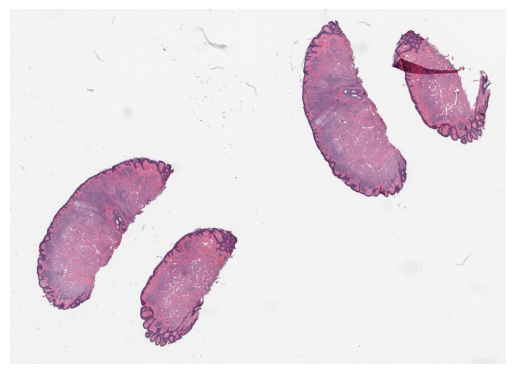

In [12]:
# Read and show lowest resolution image with level_to_dask

last_level = server.metadata.n_resolutions - 1
lowest_resolution = server.level_to_dask(last_level)

# Pixel values are not read yet, but you can get the shape of the image
print(f'Image shape: {lowest_resolution.shape}')

# Compute array. This will read the pixel values
lowest_resolution = lowest_resolution.compute()

_, ax = plt.subplots()
plotImage(ax, lowest_resolution)

Full resolution image shape: (3, 32914, 46000)
Tile shape: (3, 1000, 2000)


<Axes: >

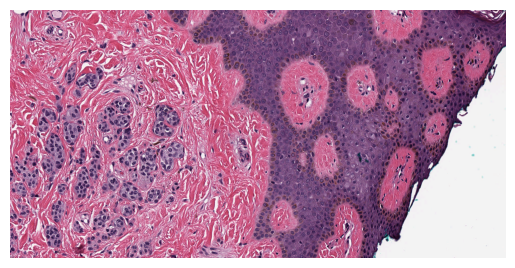

In [13]:
# Read and show tile of full resolution image with level_to_dask

first_level = 0
highest_resolution = server.level_to_dask(first_level)

print(f'Full resolution image shape: {highest_resolution.shape}')

# Only read a 2000x1000 pixels tile whose top left pixel is located at x=13000 and y=15000 on the full resolution image
x = 13000
y = 15000
width = 2000
height = 1000
tile = highest_resolution[:, y:y+height, x:x+width]

print(f'Tile shape: {tile.shape}')

# Compute array. This will only read the pixel values of the tile, not the entire image
tile = tile.compute()

_, ax = plt.subplots()
plotImage(ax, tile)

#### to_dask()

`ImageServer.to_dask()` returns a Dask array representing the image at any arbitrary downsample (even a downsample not stored in the image).

Pixels of the returned array can be accessed with the following order: (t, c, z, y, x). There may be less dimensions for simple images: for example, an image with a single timepoint and a single z-slice will return an array of dimensions (c, y, x) (which is the case here). However, there will always be dimensions x and y, even if they have a size of 1.

**Important!**
> It turns out that requesting at an arbitrary downsample level is very slow - it seems that all pixels are requested upon first compute (even for a small region), and then resized.

/Users/lleplat/QuPath/Projects/qubalab/qubalab/qubalab/images/image_server.py:198: UserWarning: Warning - calling affine_transform on a large dask array can be *very* slow
  warnings.warn('Warning - calling affine_transform on a large dask array can be *very* slow')


Image shape at downsample 1.5: (3, 21943, 30667)
Tile shape: (3, 1000, 2000)


<Axes: >

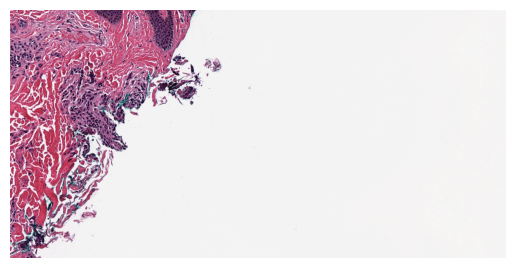

In [14]:
# Read and show a tile of the image at an arbitray downsample

downsample = 1.5
image = server.to_dask(downsample)

# Pixel values are not read yet, but you can get the shape of the image
print(f'Image shape at downsample {downsample}: {image.shape}')

# Only read a 2000x1000 pixels tile whose top left pixel is located at x=13000 and y=15000 on the downsampled image
x = 13000
y = 15000
width = 2000
height = 1000
tile = image[:, y:y+height, x:x+width]

print(f'Tile shape: {tile.shape}')

# Compute array. This will only read the pixel values of the tile, not the entire image
# This can take some time as explained above
tile = tile.compute()

_, ax = plt.subplots()
plotImage(ax, tile)

When you have a Dask Array, you can visualize the image using [napari](https://napari.org):

In [15]:
import napari
import dask.array as da

level = 0
image = server.level_to_dask(level)

# image has resolutions (c, y, x) while napari accepts
# resolutions (y, x, c), so they need to be reordered
image = da.moveaxis(image, [0], [2])

napari.view_image(image)
napari.run()

/Users/lleplat/QuPath/Projects/qubalab/qubalab/.venv/lib/python3.12/site-packages/napari/_vispy/layers/image.py:251: UserWarning: data shape (32914, 46000, 3) exceeds GL_MAX_TEXTURE_SIZE 16384 in at least one axis and will be downsampled. Rendering is currently in 2D mode.
  warnings.warn(
/Users/lleplat/QuPath/Projects/qubalab/qubalab/.venv/lib/python3.12/site-packages/napari/_vispy/layers/image.py:251: UserWarning: data shape (32914, 46000, 3) exceeds GL_MAX_TEXTURE_SIZE 16384 in at least one axis and will be downsampled. Rendering is currently in 2D mode.
  warnings.warn(
